# Project Name: Uber Data Analysis to predict the Cab Fares.

In [ ]:
!pip install pandas numpy seaborn matplotlib scikit-learn

## Importing the libraries.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc 
import os
%matplotlib inline

## Importing the Dataset.

In [2]:
weather_data = pd.read_csv("weather.csv")
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [3]:
cab_data = pd.read_csv("cab_rides.csv")
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


## Exploratory Data Analysis.

In [4]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [6]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [7]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['datetime'] = pd.to_datetime(weather_data['time_stamp'])
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901
...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,1970-01-01 00:00:01.543819974
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,1970-01-01 00:00:01.543819974


In [8]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [9]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'datetime'],
      dtype='object')

In [10]:
weather_data.drop(['datetime'], axis = 1, inplace = True)

In [11]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [12]:
cab_data.shape

(693071, 11)

In [13]:
weather_data.shape

(6276, 8)

In [14]:
from warnings import filterwarnings
filterwarnings("ignore")
cab_data.describe(include='all') #Intial part of EDA 

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
count,693071.000000,693071,6.930710e+05,693071,693071,637976.000000,693071.000000,693071,693071,693071,693071
unique,NaN,2,NaN,12,12,NaN,NaN,693071,13,13,114335
top,NaN,Uber,NaN,Financial District,Financial District,NaN,NaN,f9c48298-26cd-4038-b6ee-ff864de79939,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,Black SUV,1970-01-01 00:25:43.270450151
freq,NaN,385663,NaN,58851,58857,NaN,NaN,1,55096,55096,56
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:25:43.203646318
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:25:45.160510943
mean,2.189430,NaN,1.544046e+12,NaN,NaN,16.545125,1.013870,NaN,NaN,NaN,NaN
std,1.138937,NaN,6.891925e+08,NaN,NaN,9.324359,0.091641,NaN,NaN,NaN,NaN
min,0.020000,NaN,1.543204e+12,NaN,NaN,2.500000,1.000000,NaN,NaN,NaN,NaN
25%,1.280000,NaN,1.543444e+12,NaN,NaN,9.000000,1.000000,NaN,NaN,NaN,NaN


In [15]:
weather_data.describe(include='all')

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
unique,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Financial District,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,523,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.090475,NaN,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,NaN,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,NaN,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,NaN,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,NaN,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,NaN,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000


In [16]:
a = pd.concat([cab_data, weather_data]) #Concatinating the two Data Frames.

In [17]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
a['day']=a.datetime.dt.day
a['hour']=a.datetime.dt.hour

In [19]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [20]:
a.fillna(0,inplace=True)

In [21]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,0,44.72,North Station,0.89,1000.69,0.0,0.96,1.52,0.0,0.0
6272,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,0,44.85,Northeastern University,0.88,1000.71,0.0,0.96,1.54,0.0,0.0
6273,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,0,44.82,South Station,0.89,1000.70,0.0,0.96,1.54,0.0,0.0
6274,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,0,44.78,Theatre District,0.89,1000.70,0.0,0.96,1.54,0.0,0.0
6275,0.0,0,1543819974,0,0,0.0,0.0,0,0,0,0,44.69,West End,0.89,1000.70,0.0,0.96,1.52,0.0,0.0


In [23]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [24]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

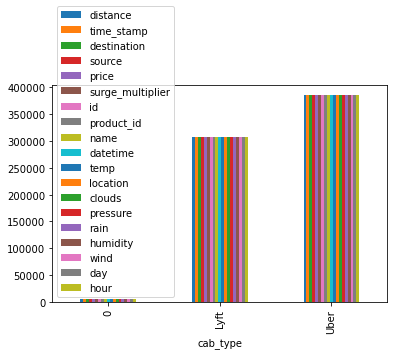

In [25]:
a.groupby('cab_type').count().plot.bar() #groupby used to seperate the datapoints from the cab_type column.

<AxesSubplot:>

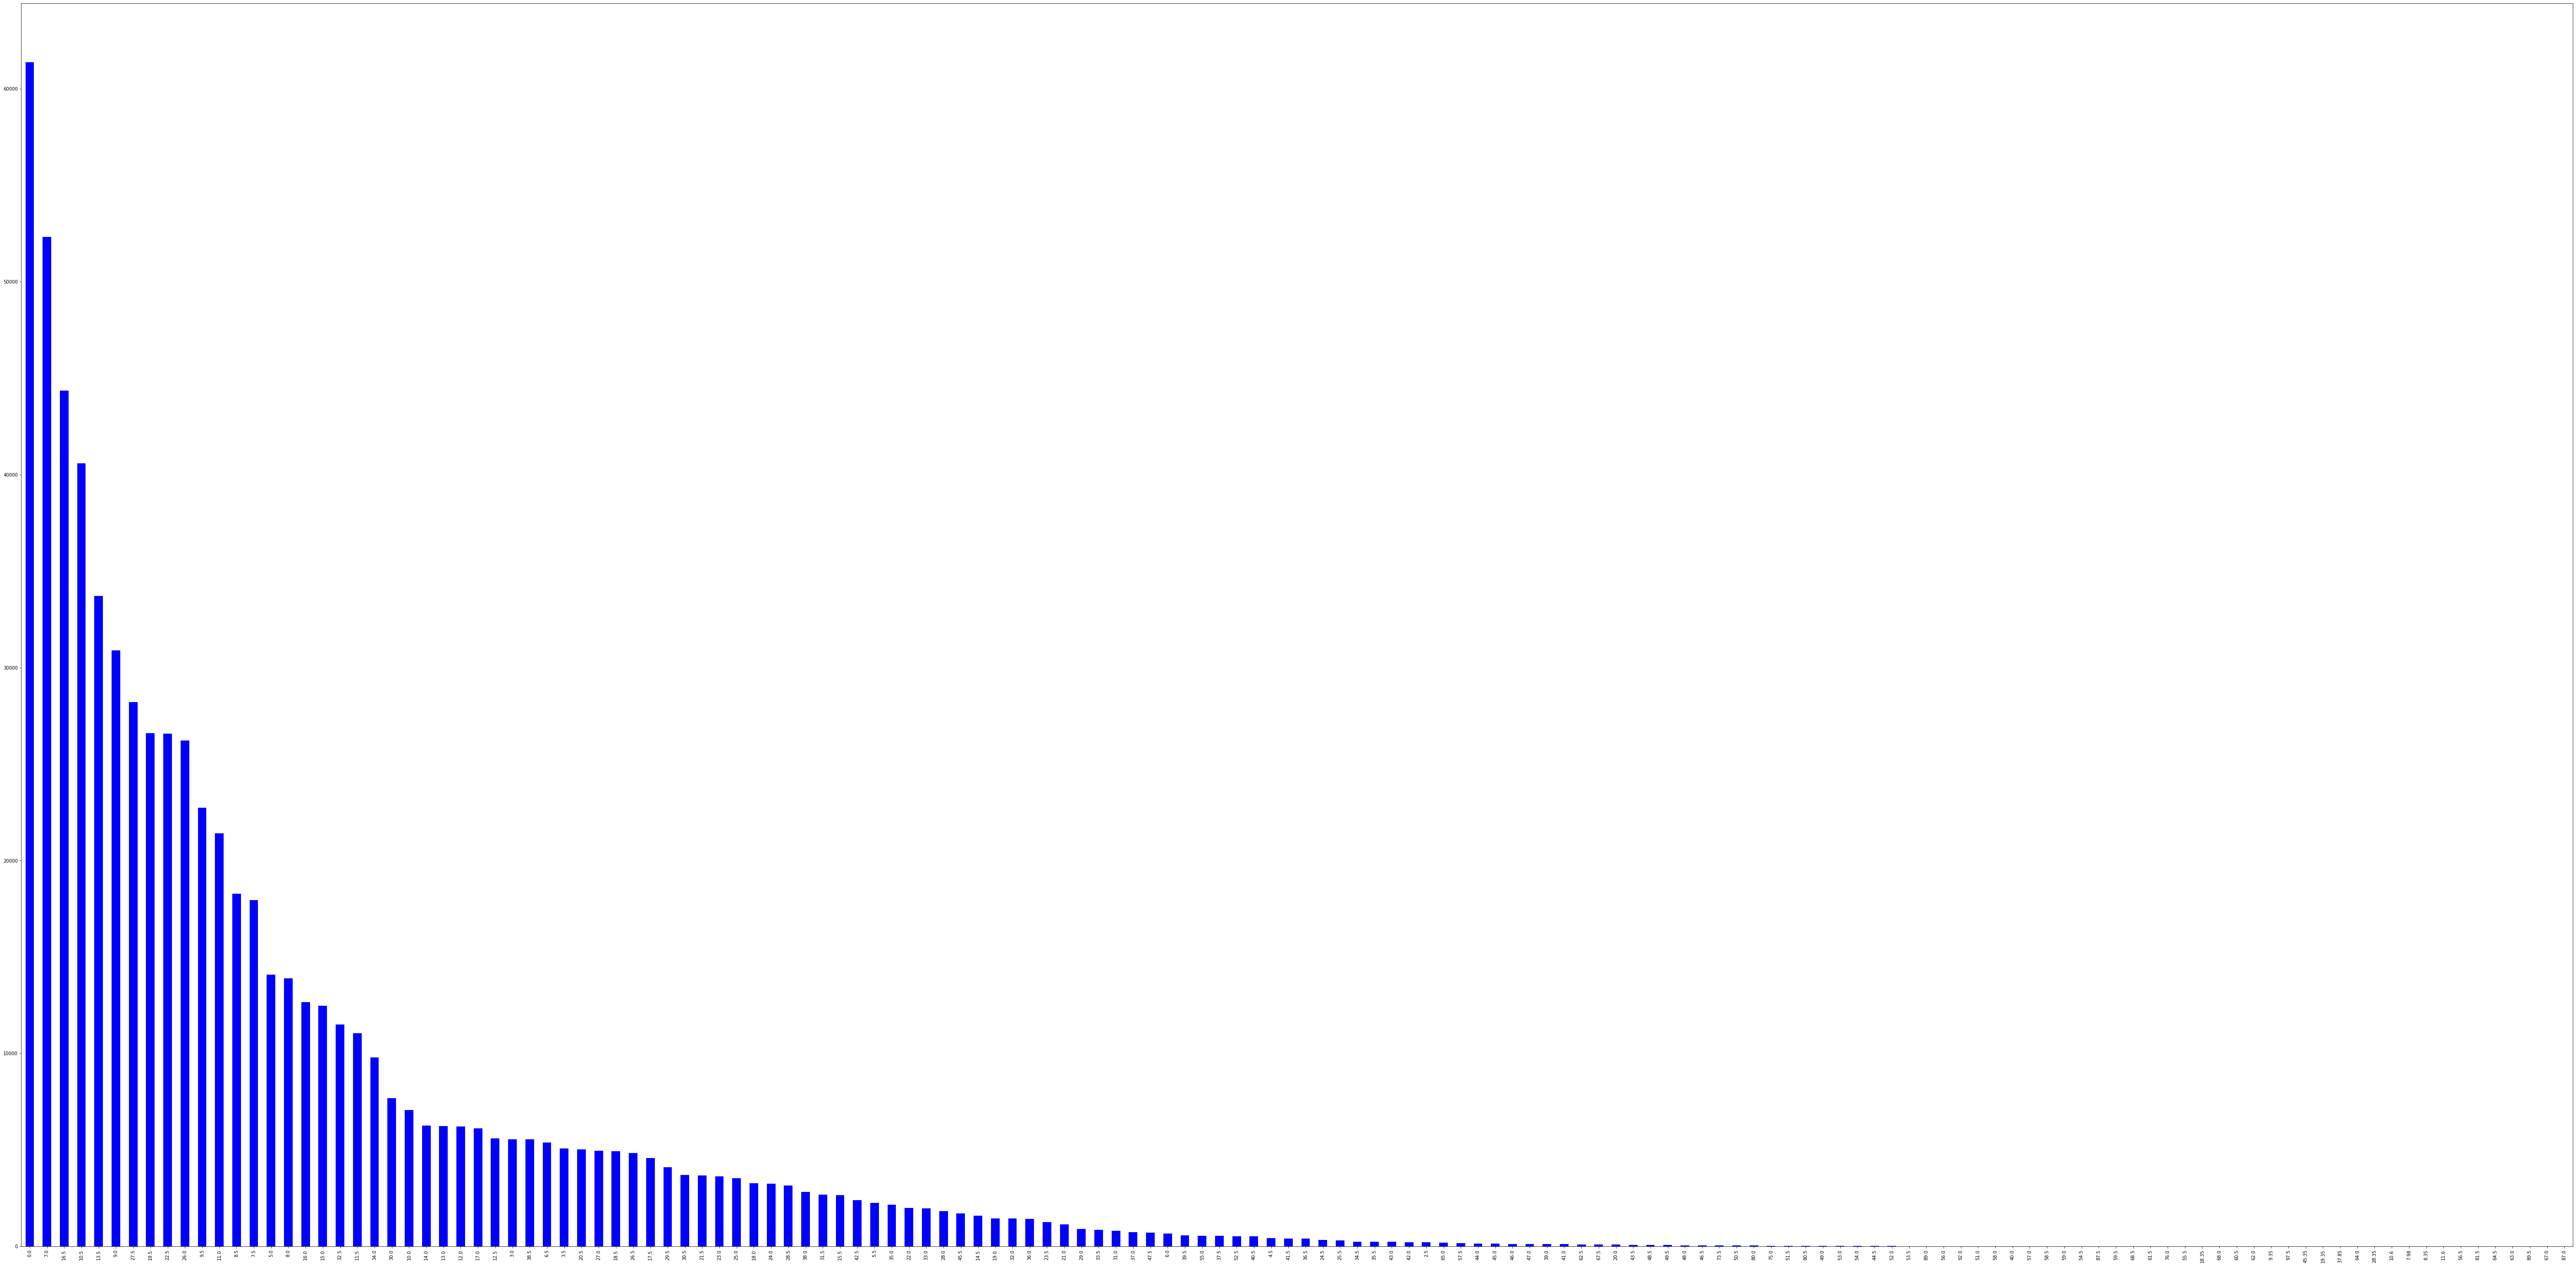

In [26]:
a['price'].value_counts().plot(kind='bar', figsize=(100,50),color='blue')

<AxesSubplot:>

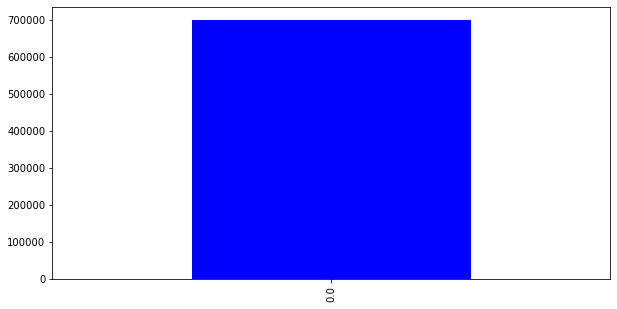

In [27]:
a['hour'].value_counts().plot(kind='bar', figsize=(10,5),color='blue')

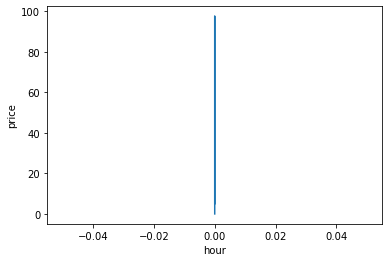

In [28]:
# cab fares acc. to the timmings.
x=a['hour']
y=a['price']
plt.xlabel('hour')
plt.ylabel('price')
plt.plot(x,y)
plt.show()

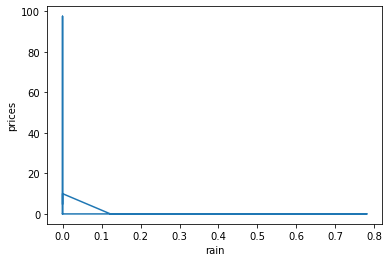

In [29]:
# Cab fares acc. to the weather condition.
x=a['rain']
y=a['price']
plt.xlabel('rain')
plt.ylabel('prices')
plt.plot(x,y)
plt.show()

In [30]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [31]:
x1 = a[['distance', 'clouds', 'pressure','humidity', 'wind', 'rain', 'day', 'hour', 'surge_multiplier']]
y1 = a['price']

# Building Machine learning Model.
# Using Skcit-learn to split data into training & testing set.

In [32]:
from sklearn.model_selection import train_test_split
# split the data into training & testing set.
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [33]:
linear=LinearRegression()
linear.fit(x_train, x_test)

LinearRegression()

In [34]:
# predicting the cab fares acc. to the cab_drives & weather Dataset.
predictions=linear.predict(y_train)
predictions

array([32.54791635, 14.75560763, 16.81696874, ..., 11.82898384,
       11.85443274, 13.22867348])

In [35]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : predictions})
df

,Actual,Predicted
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


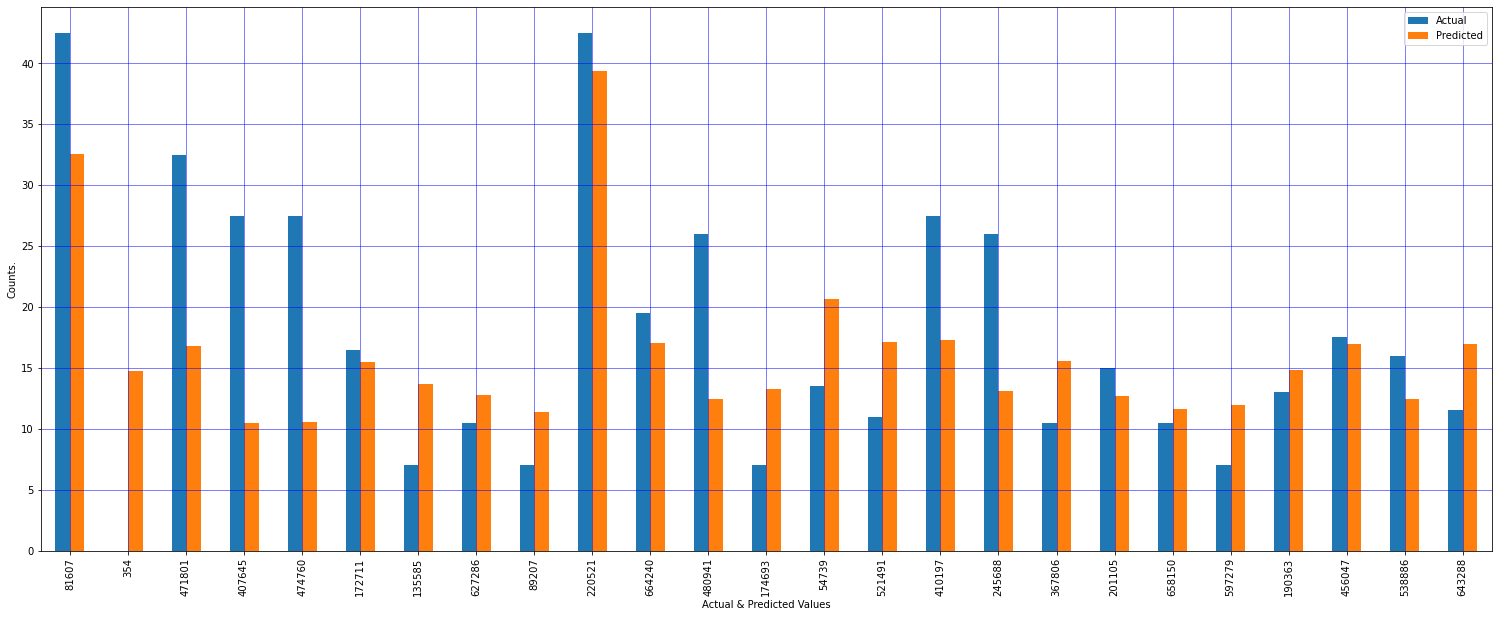

In [39]:
# fine tunning of the model.
df1 = df.head(25)
df1.plot(kind='bar', figsize=(26,10))
plt.grid(which ='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which ='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Actual & Predicted Values')
plt.ylabel('Counts.')
plt.show()